In [79]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Read data from the spreadsheet
data = pd.read_csv("cleaned_mlready_combinedData1.csv")

In [80]:
# check out fire and no fire ratio
data["Fire"].value_counts()

0    7156
1     115
Name: Fire, dtype: int64

In [81]:
# divide data into train, and testing
X = data.copy()
y = X['Fire']
X = X.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [82]:
#Default training set, get a model baseline
clf_base = DecisionTreeClassifier(random_state=4)
clf_base = clf_base.fit(X_train, y_train)

In [83]:
#baseline predictions, amd confusion matrix of the baseline model
prediction_base = clf_base.predict(X_test)
confusion_matrix(y_test, prediction_base, labels=[0,1])

array([[1403,   32],
       [  20,    0]], dtype=int64)

In [84]:
#look at the importance of each feature
feature_names = X.columns
pd.DataFrame(clf_base.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.056859
T_DAILY_AVG,0.022545
P_DAILY_CALC,0.017089
SOLARAD_DAILY,0.198615
SUR_TEMP_DAILY_MAX,0.072271
SUR_TEMP_DAILY_AVG,0.052804
RH_DAILY_MIN,0.090710
RH_DAILY_AVG,0.087520
SOIL_MOISTURE_5_DAILY,0.075688
SOIL_MOISTURE_10_DAILY,0.034966


In [85]:
#Get report on base model
print(classification_report(y_test,prediction_base))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1435
           1       0.00      0.00      0.00        20

    accuracy                           0.96      1455
   macro avg       0.49      0.49      0.49      1455
weighted avg       0.97      0.96      0.97      1455



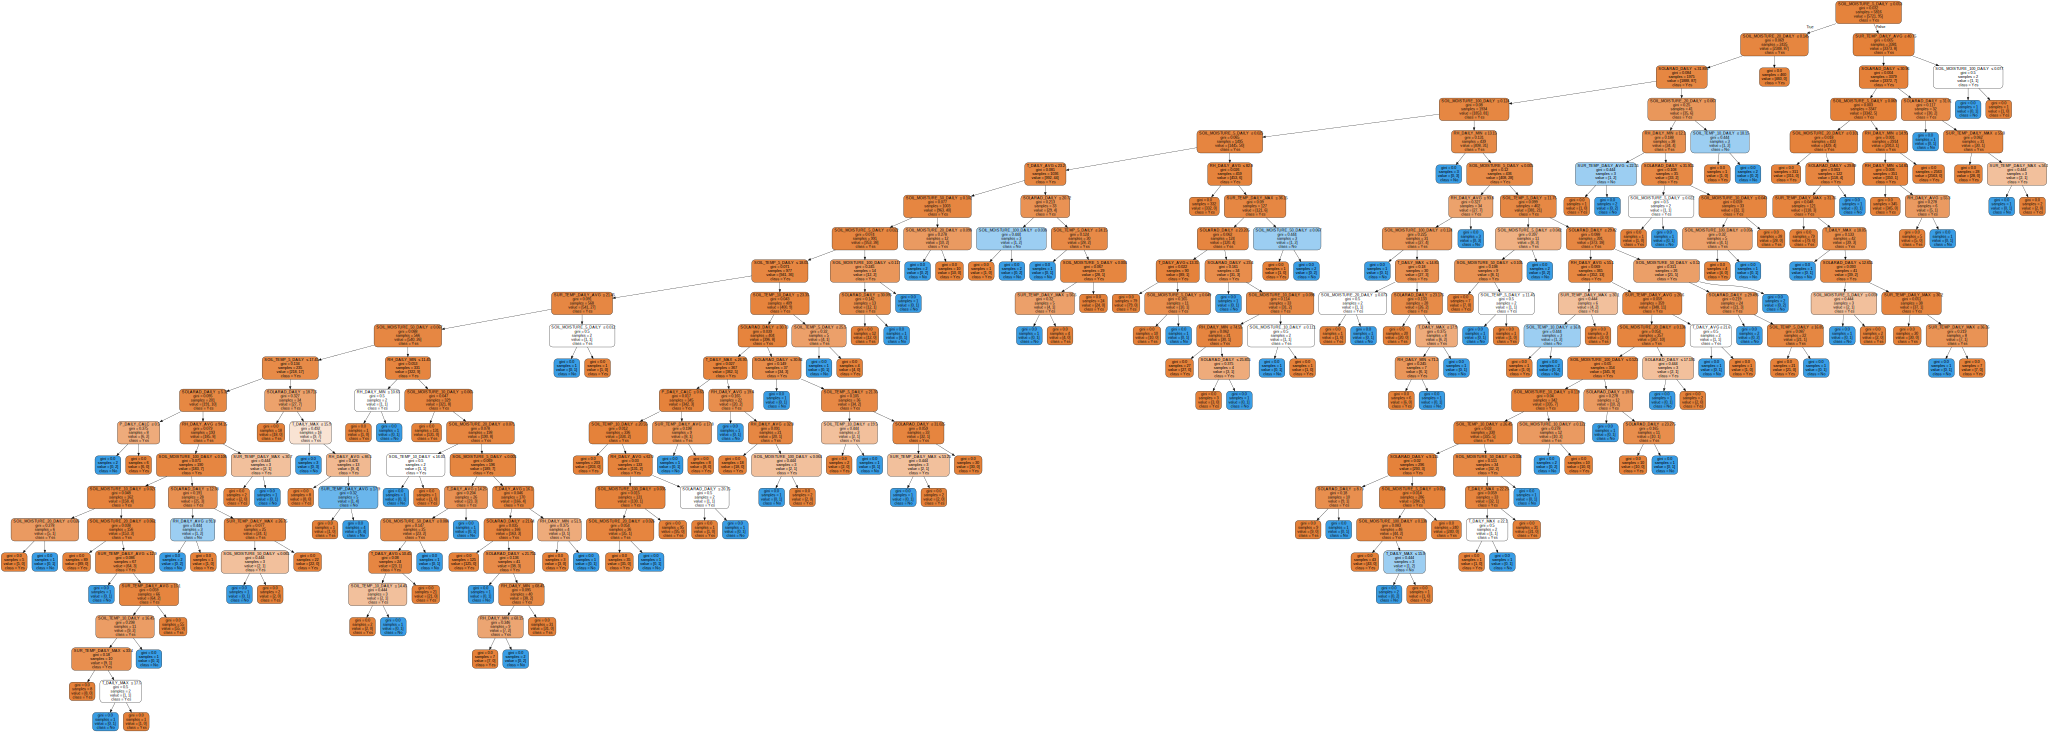

In [86]:
#Base model decision tree structure view
visualization = tree.export_graphviz(clf_base, out_file=None, feature_names=X.columns, class_names=['Yes','No'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(visualization)
graph

In [87]:
#cross validation of the base model:Accuracy
score = cross_val_score(clf_base, X, y, cv= 5, scoring="accuracy")
score

array([0.92920962, 0.9477304 , 0.87070151, 0.97248968, 0.95873453])

In [88]:
#Tuned decision tree training with no oversampling
clf_Iteration1 = DecisionTreeClassifier(class_weight={1:65,0:1}, max_depth=8, criterion="entropy", random_state=4)
clf_Iteration1 = clf_Iteration1.fit(X_train, y_train)

In [89]:
#make another prediction on the new model and show confusion matrix of the new model on test data
predictions_iteration1 = clf_Iteration1.predict(X_test)
confusion_matrix(y_test, predictions_iteration1, labels=[0,1])

array([[1032,  403],
       [   2,   18]], dtype=int64)

In [90]:
#look at the importance of each feature of the improved model
clf_Iteration1.feature_importances_
feature_names = X.columns
pd.DataFrame(clf_Iteration1.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.000000
T_DAILY_AVG,0.000000
P_DAILY_CALC,0.000000
SOLARAD_DAILY,0.000000
SUR_TEMP_DAILY_MAX,0.000000
SUR_TEMP_DAILY_AVG,0.004864
RH_DAILY_MIN,0.091989
RH_DAILY_AVG,0.015622
SOIL_MOISTURE_5_DAILY,0.603502
SOIL_MOISTURE_10_DAILY,0.000000


In [91]:
#Get report on base model
print(classification_report(y_test,predictions_iteration1))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1435
           1       0.04      0.90      0.08        20

    accuracy                           0.72      1455
   macro avg       0.52      0.81      0.46      1455
weighted avg       0.98      0.72      0.83      1455



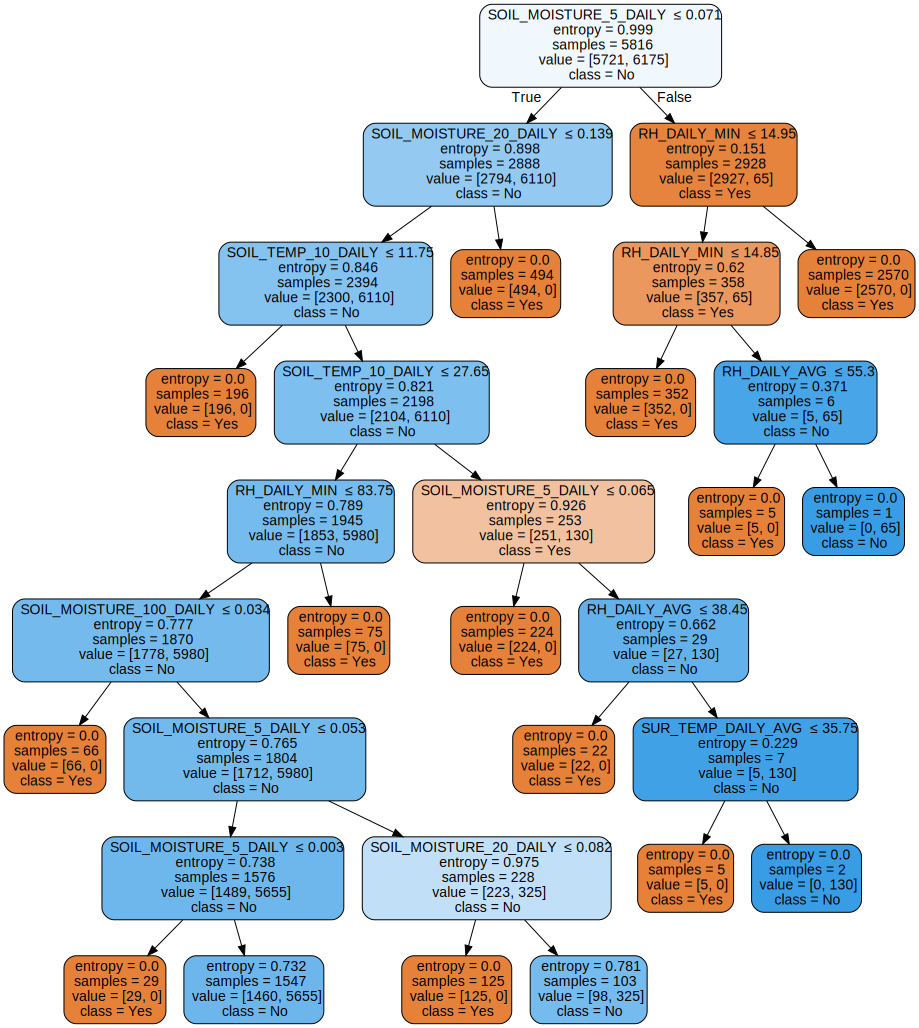

In [92]:
#Tuned DT model decision tree structure view
visualization = tree.export_graphviz(clf_Iteration1, out_file=None, feature_names=X.columns, class_names=['Yes','No'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(visualization)
graph

In [93]:
#cross validation score for improved tuned DT model decision tree: accuracy
cross_val_score(clf_Iteration1,X,y,scoring="accuracy", cv=3)

array([0.74174917, 0.76980198, 0.76557986])

In [94]:
#Random Over Sampling the imbalanced Dataset
#Random Over Sampling duplicates the existing minority output class and add it to the pool
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X = data.copy()
y = X['Fire']
X_resampled, y_resampled = ros.fit_resample(X,y)
y_resampled = X_resampled['Fire']
X_resampled = X_resampled.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)

In [95]:
#Train the model with RandomOversamplier Balanced Data, and default DT model to get a baseline
clf_Iteration1_AfterResampled = DecisionTreeClassifier()
clf_Iteration1_AfterResampled = clf_Iteration1_AfterResampled.fit(X_train, y_train)

In [96]:
#make a prediction with newly trained model and show confusion matrix base on how the model predicts on test data
predictions_iteration1_AfterResampled = clf_Iteration1_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration1_AfterResampled, labels=[0,1])

array([[1366,   27],
       [   0, 1470]], dtype=int64)

In [97]:
#cross validation score for Random Oversamplied DT model: Accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.96611946, 0.95738736, 0.96086653, 0.97030049, 0.95038435])

In [98]:
#Get report on  Random Oversamplied DT model
print(classification_report(y_test,predictions_iteration1_AfterResampled))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1393
           1       0.98      1.00      0.99      1470

    accuracy                           0.99      2863
   macro avg       0.99      0.99      0.99      2863
weighted avg       0.99      0.99      0.99      2863



In [99]:
# Get feature importance Random Oversamplied DT model
clf_Iteration1_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration1_AfterResampled.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.029977
T_DAILY_AVG,0.022203
P_DAILY_CALC,0.004760
SOLARAD_DAILY,0.037289
SUR_TEMP_DAILY_MAX,0.084103
SUR_TEMP_DAILY_AVG,0.019392
RH_DAILY_MIN,0.071137
RH_DAILY_AVG,0.035744
SOIL_MOISTURE_5_DAILY,0.396488
SOIL_MOISTURE_10_DAILY,0.036959


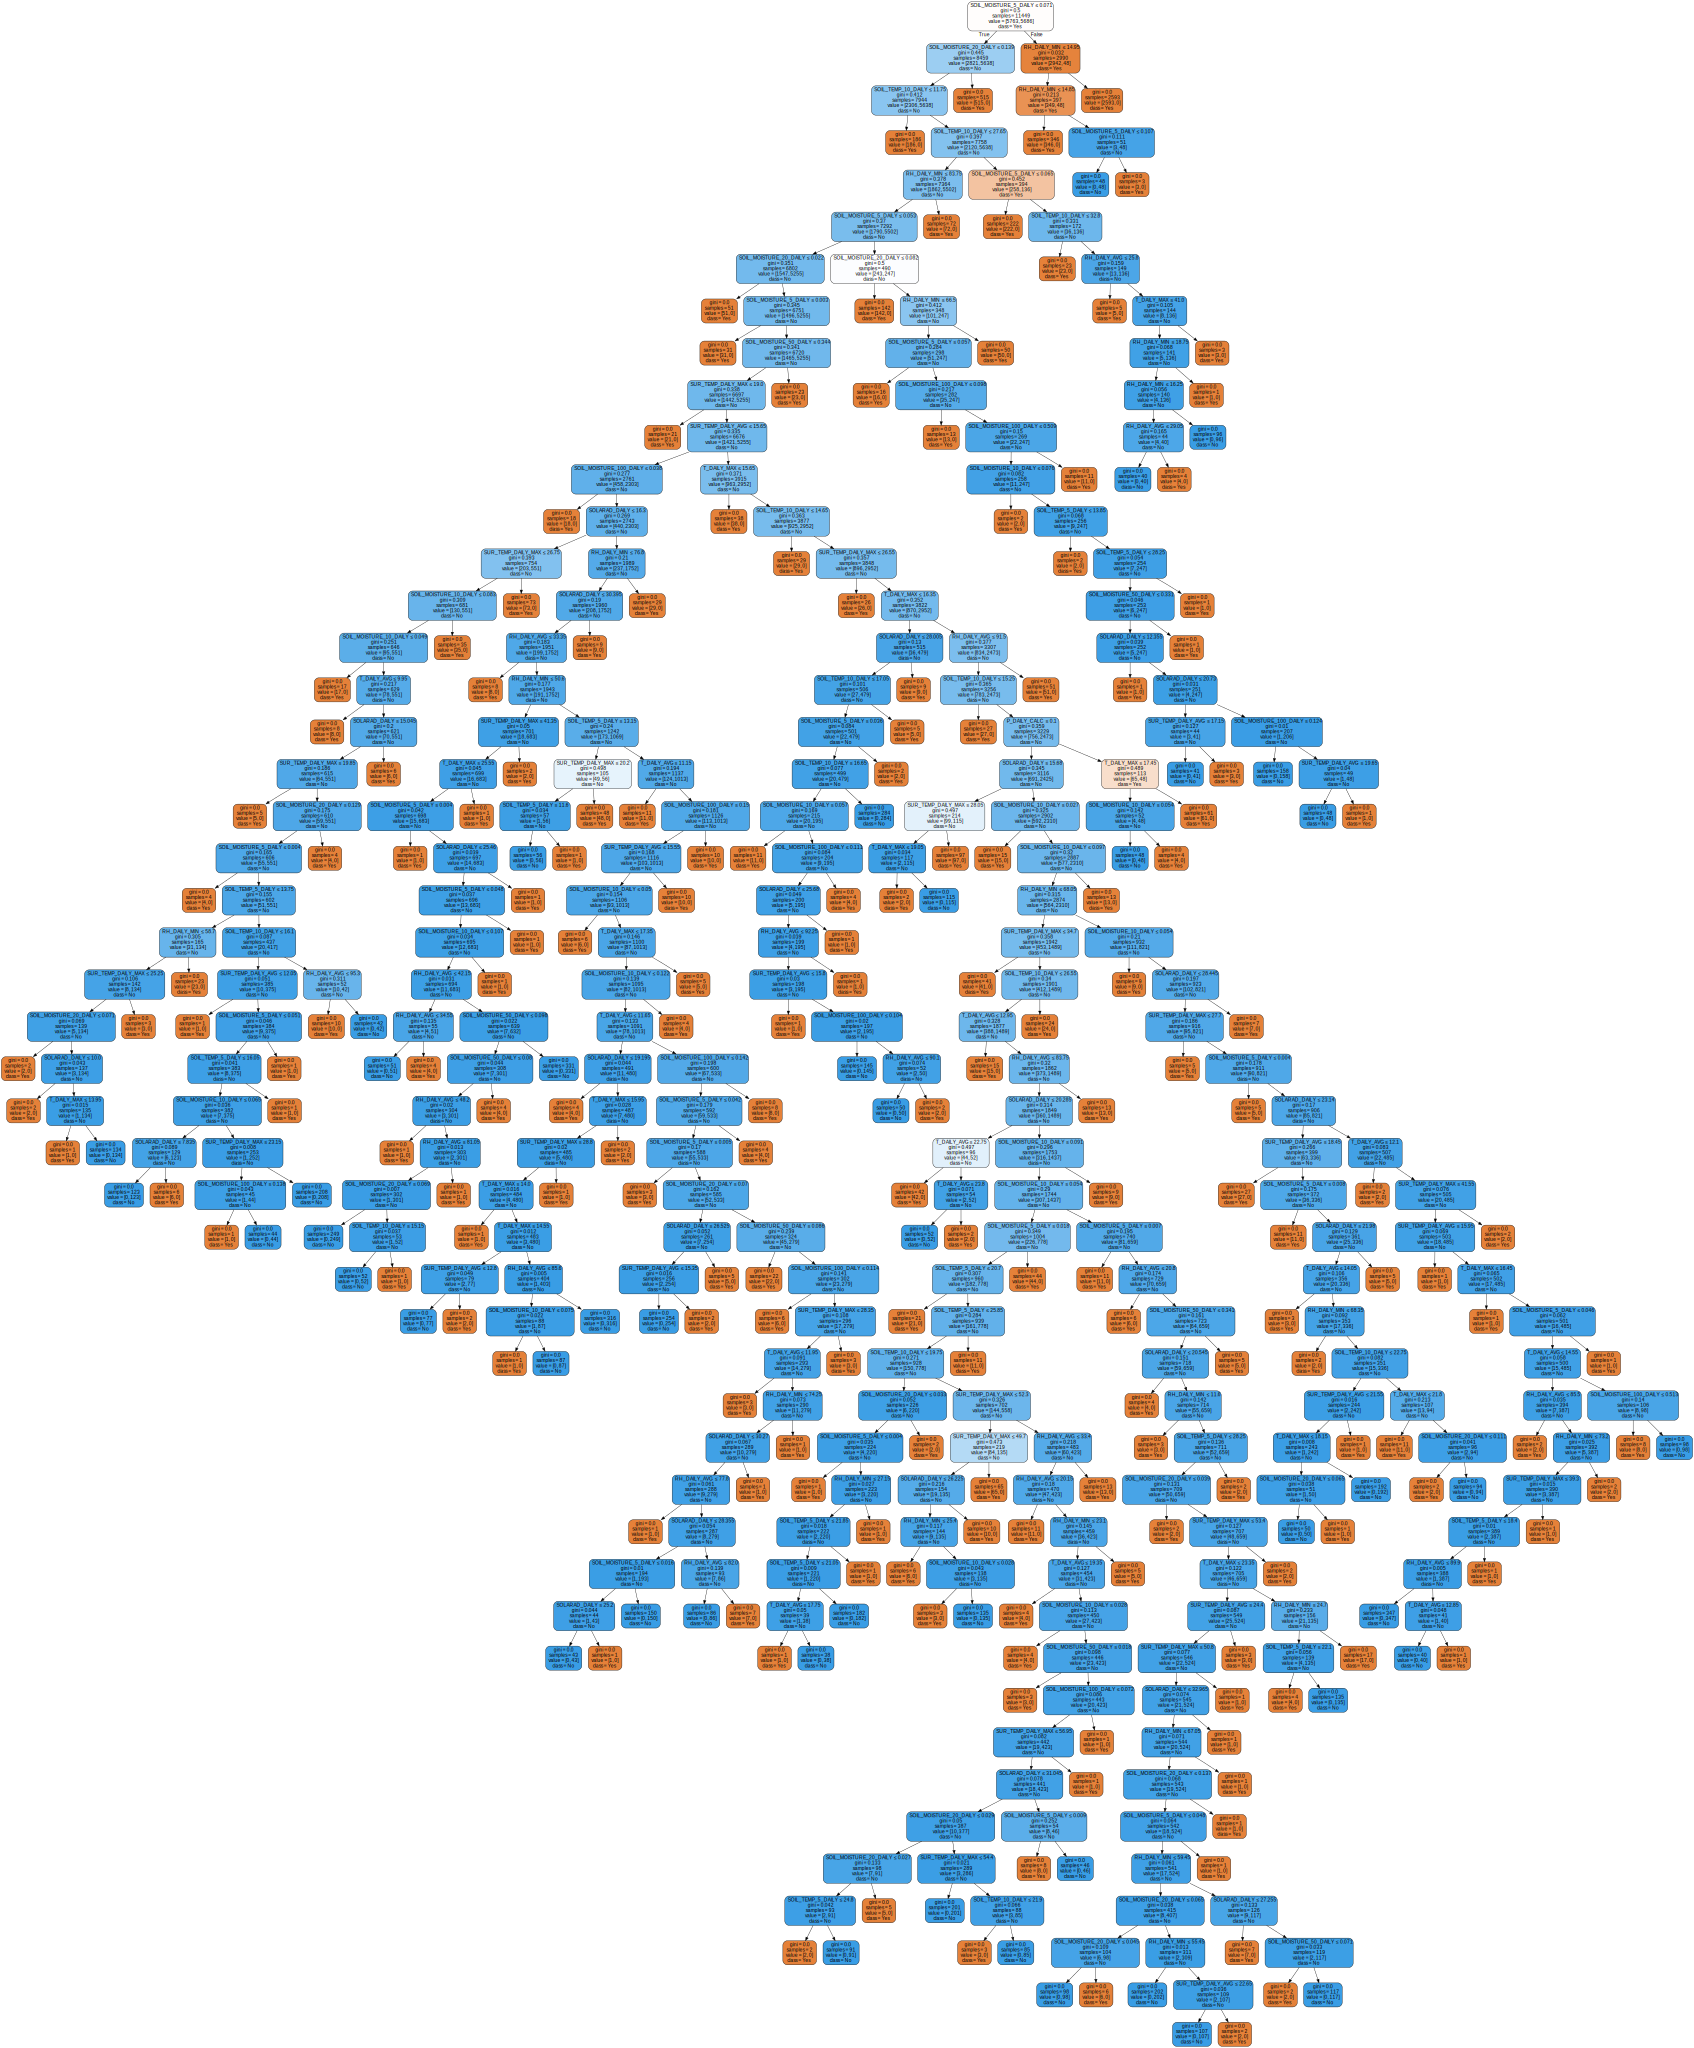

In [100]:
#Display the tree for Random Oversamplied DT model
visualization = tree.export_graphviz(clf_Iteration1_AfterResampled, out_file=None, feature_names=X_resampled.columns, class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph

In [101]:
#import SMOTE oversamplier
#SMOTE oversamplier is another way to oversample data, but instead of duplicate exact same minority data, it initiates relatively similar minority samples.
from imblearn.over_sampling import SMOTE
X = data.copy()
y = X['Fire']
X_resampled, y_resampled = SMOTE().fit_resample(X,y)
y_resampled = X_resampled['Fire']
X_resampled = X_resampled.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)

In [102]:
#Train the DT model with SMOTE oversampled dataset and default setting
clf_Iteration1_AfterResampled = DecisionTreeClassifier()
clf_Iteration1_AfterResampled = clf_Iteration1_AfterResampled.fit(X_train, y_train)

In [103]:
#make another prediction using DT model with SMOTE oversampled dataset and default setting and show confusion matrix
predictions_iteration1_AfterResampled = clf_Iteration1_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration1_AfterResampled, labels=[0,1])

array([[1314,   62],
       [  35, 1452]], dtype=int64)

In [104]:
#cross validation score for DT model with SMOTE oversampled dataset and default setting: accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.91232972, 0.91582256, 0.86792453, 0.92033543, 0.91125087])

In [105]:
#Get report on DT model with SMOTE oversampled dataset and default setting
print(classification_report(y_test,predictions_iteration1_AfterResampled))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1376
           1       0.96      0.98      0.97      1487

    accuracy                           0.97      2863
   macro avg       0.97      0.97      0.97      2863
weighted avg       0.97      0.97      0.97      2863



In [106]:
# Get feature importance of DT model with SMOTE oversampled dataset and default setting
clf_Iteration1_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration1_AfterResampled.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.032821
T_DAILY_AVG,0.019591
P_DAILY_CALC,0.009826
SOLARAD_DAILY,0.039533
SUR_TEMP_DAILY_MAX,0.044860
SUR_TEMP_DAILY_AVG,0.010512
RH_DAILY_MIN,0.063744
RH_DAILY_AVG,0.046967
SOIL_MOISTURE_5_DAILY,0.404845
SOIL_MOISTURE_10_DAILY,0.051511


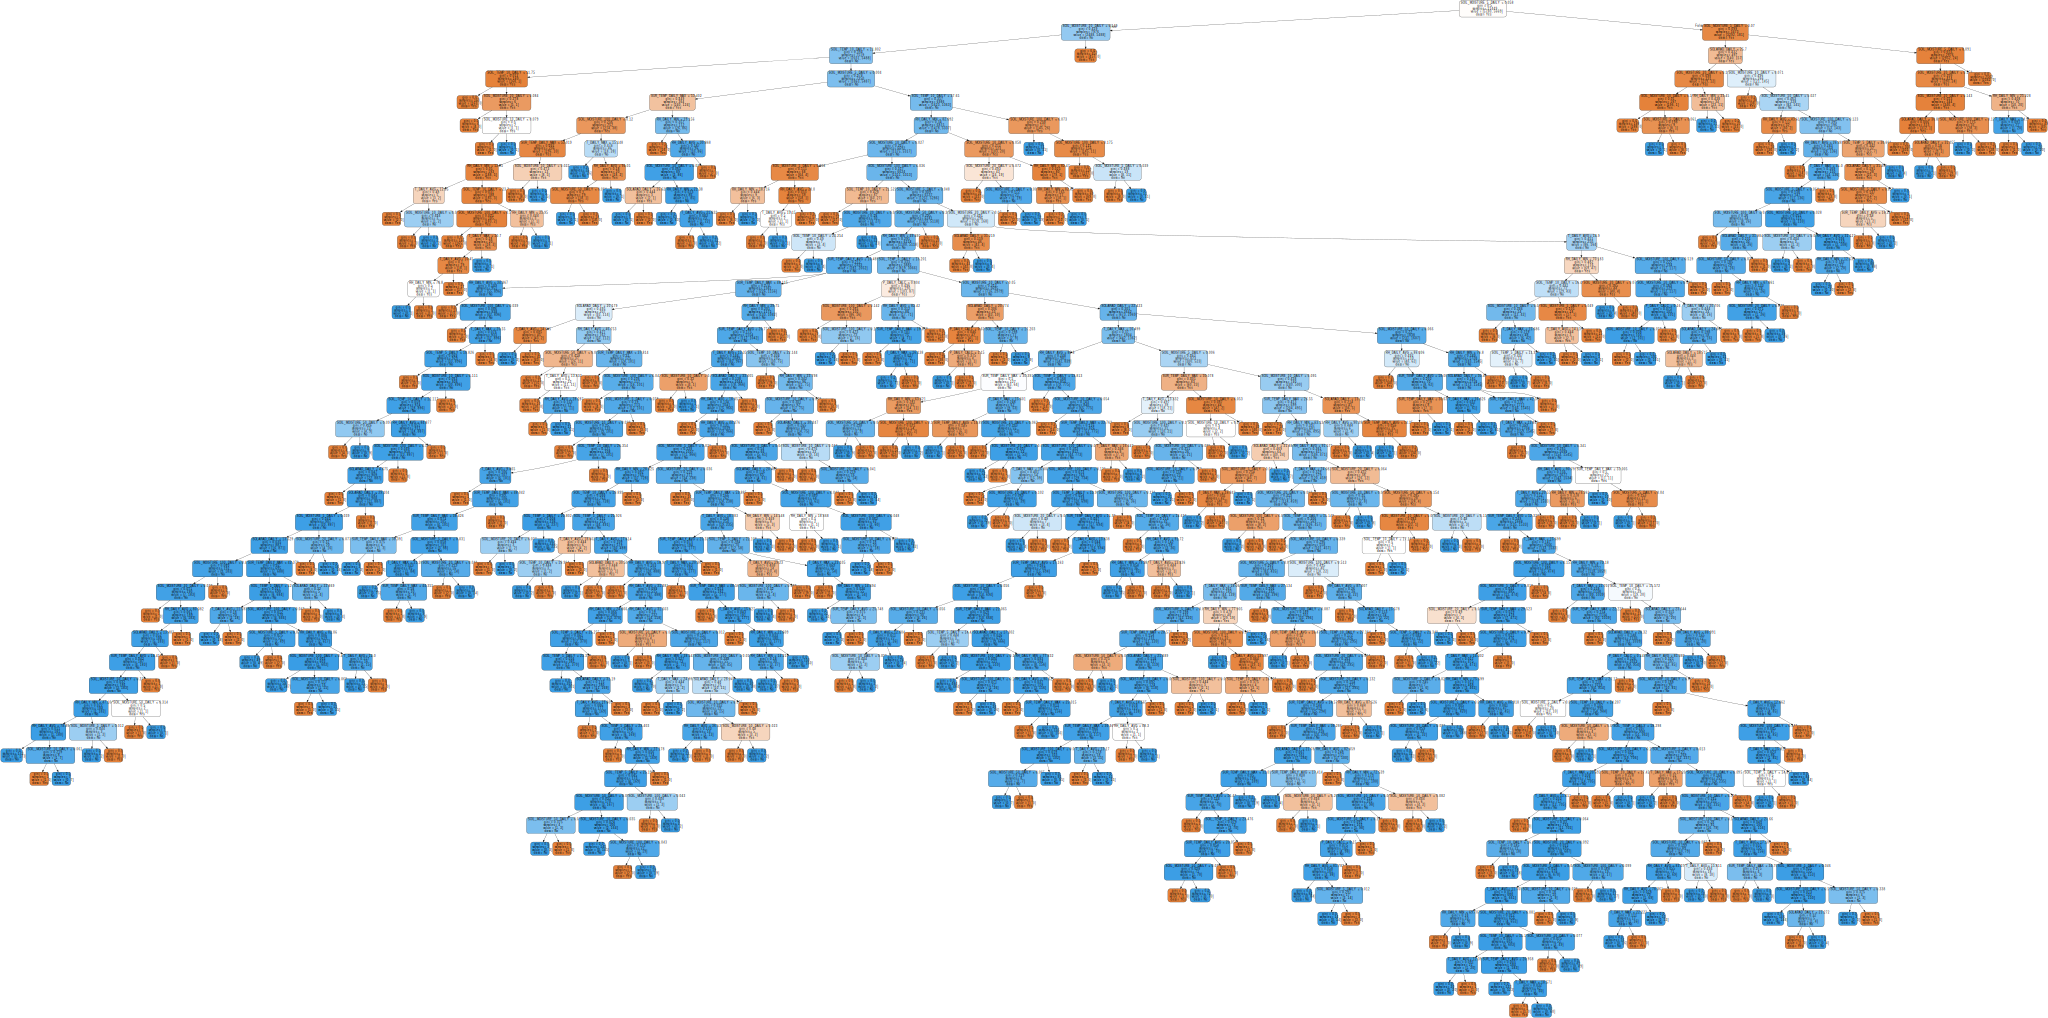

In [107]:
#Display the tree for DT model with SMOTE oversampled dataset and default setting
visualization = tree.export_graphviz(clf_Iteration1_AfterResampled, out_file=None, feature_names=X_resampled.columns, class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph

In [108]:
#Train the DT model with SMOTE oversampled dataset and Tuned hyperparameter
clf_Iteration2_AfterResampled = DecisionTreeClassifier(max_depth=30,random_state=4,criterion="entropy")
clf_Iteration2_AfterResampled = clf_Iteration2_AfterResampled.fit(X_train, y_train)

In [109]:
#make another prediction using DT model with SMOTE oversampled dataset and Tuned hyperparameter and show confusion matrix
predictions_iteration2_AfterResampled = clf_Iteration2_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration2_AfterResampled, labels=[0,1])

array([[1309,   67],
       [  41, 1446]], dtype=int64)

In [110]:
#cross validation score for DT model with SMOTE oversampled dataset and Tuned hyperparameter : accuracy
cross_val_score(clf_Iteration2_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.89276982, 0.91128187, 0.89867226, 0.92627533, 0.91160028])

In [111]:
#Get report on DT model with SMOTE oversampled dataset and Tuned hyperparameter
print(classification_report(y_test,predictions_iteration2_AfterResampled))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1376
           1       0.96      0.97      0.96      1487

    accuracy                           0.96      2863
   macro avg       0.96      0.96      0.96      2863
weighted avg       0.96      0.96      0.96      2863



In [112]:
# Get feature importance of DT model with SMOTE oversampled dataset and Tuned hyperparameter
clf_Iteration2_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration2_AfterResampled.feature_importances_, index=feature_names)

,0
T_DAILY_MAX,0.030975
T_DAILY_AVG,0.022892
P_DAILY_CALC,0.009180
SOLARAD_DAILY,0.043646
SUR_TEMP_DAILY_MAX,0.037238
SUR_TEMP_DAILY_AVG,0.024513
RH_DAILY_MIN,0.074877
RH_DAILY_AVG,0.035232
SOIL_MOISTURE_5_DAILY,0.430114
SOIL_MOISTURE_10_DAILY,0.036422


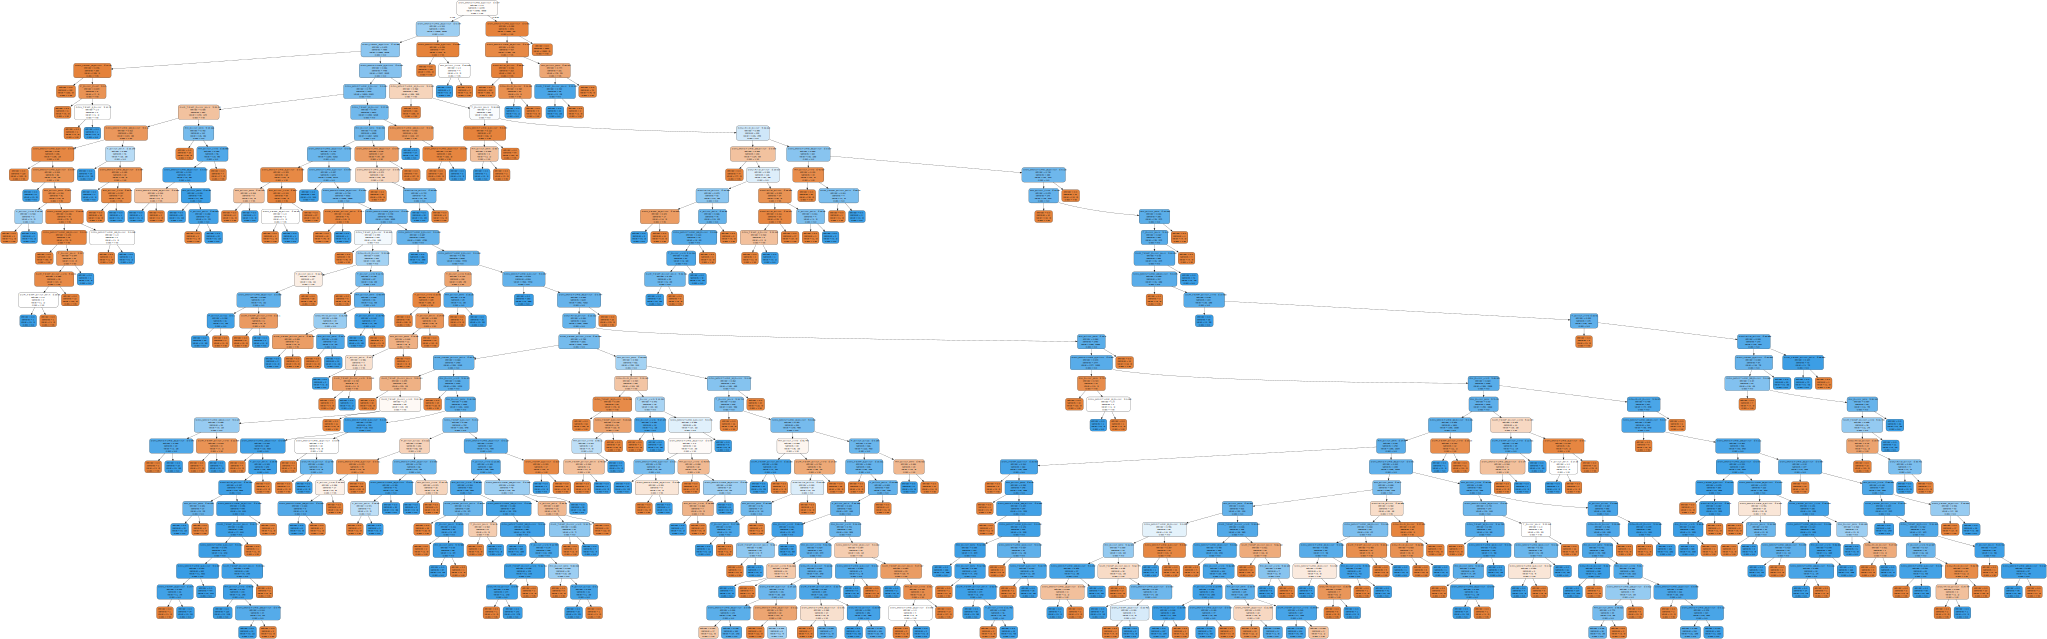

In [113]:
#Display the tree for DT model with SMOTE oversampled dataset and Tuned hyperparameter
visualization = tree.export_graphviz(clf_Iteration2_AfterResampled, out_file=None, feature_names=X_resampled.columns,
                                     class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph